## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`GROUP NAME`

`GROUP MEMBERS`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [53]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

# Classification 

For this task we will use the US Census dataset, which is available from the [UCI Machine Learning repository](http://archive.ics.uci.edu/ml/index.php). 

In particular, the training dataset is contained in the file [http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) in CSV-like form, without any header information. 

The columns can be set according to the following names:

```python
[
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
```

The `fnlwgt` column should be ignored as it is not relevant for the analysis. You will notice that a question mark `?` is used when data is missing.

The classification target will be to predict whether the `Income` attribute will be greater than (or equal to) or less than 50K US$ based on the other demo- and socio-graphic attributes.

## Exercise

Load the dataset into a pandas `dataframe`, set the column names, drop the `fnlwgt` attribute (recall the `drop()` dataframe method) and inspect the data. In particular, check the nature (categorical, numerical, etc.) of each column, the range of values (use the `describe()` method) or the unique values (using the `unique()` method on each categorical data column).

In [54]:
import requests

# If the file does not exist, download it.
if not os.path.isfile('adult.data'):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
    r = requests.get(url)
    with open('adult.data', 'wb') as f:
        f.write(r.content)

import pandas as pd

df = pd.read_csv('adult.data', header=None)

df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

# Drop fnlwgt column.
df.drop(columns=['fnlwgt'], inplace=True)

display(df.head())

display(df.describe())

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,Age,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Exercise: Cleaning

You might notice that the strings for categorical variables are not normalized and leading and trailing spaces might be present, moreover the `?` might appear in the data, indicating a missing information. Normalize strings by applying the `strip()` method on the string representation and impute `np.nan` in place of the `?`.

In [55]:
import numpy as np

# Normalise strings by stripping on categorical rows.
categorical = ['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry', 'Income']
df[categorical] = df[categorical].apply(lambda x: x.str.strip())

# Replace ? with NaN.
df.replace('?', np.nan, inplace=True)

display(df)

# Show NaN values.
display(df.isna().sum())


,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Age                 0
WorkClass        1836
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     583
Income              0
dtype: int64

## Check the balancing of the classification attribute

To verify how the different class values of the `Income` variable values are distributed (i.e., what's the percentage of "<=50K" and ">50K" with respect to the total size of the dataset you might plot the balancing by means of a seaborn countplot graph `sns.countplot(x="Attribute", data=df)`.

<Axes: xlabel='Income', ylabel='count'>

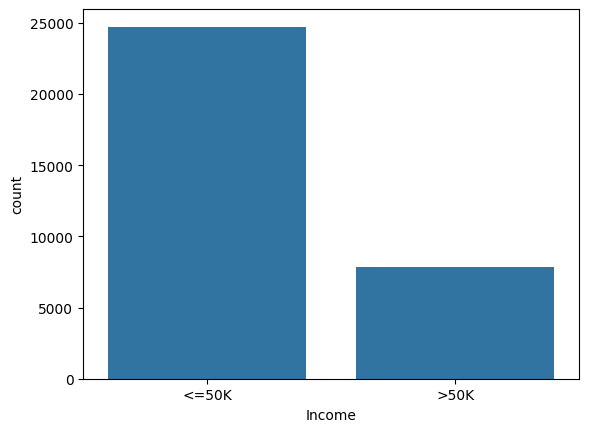

In [56]:
import seaborn as sns

df['Income'].value_counts() / df.shape[0]
sns.countplot(x="Income", data=df)

## Plotting Categorical Attributes

To look at the balance/discriminative effect of the different categorical attributes among the predicted attribute, use the seaborn `sns.countplot(y=attribute, hue='Income', data=df)` function to plot some bars of the different counts of the categorical attributes. The use of `Income` for the hue, will divide the plot for the two classification values.

**Note**: you can put the plot creation in a `for` loop that iterates along all categorical attribute names. In that case, in order to create a new picture for each attribute you must call `plt.figure()` (where `plt` is `matplotlib.pyplot`, imported as usual) to create a new figure.

You will notice that, in a coarse grain view, there is no clear balance among the different attributes, so all of them could be profitably used for classification purpose.

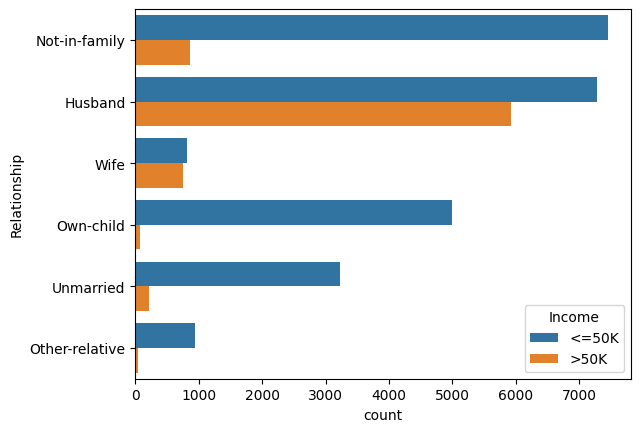

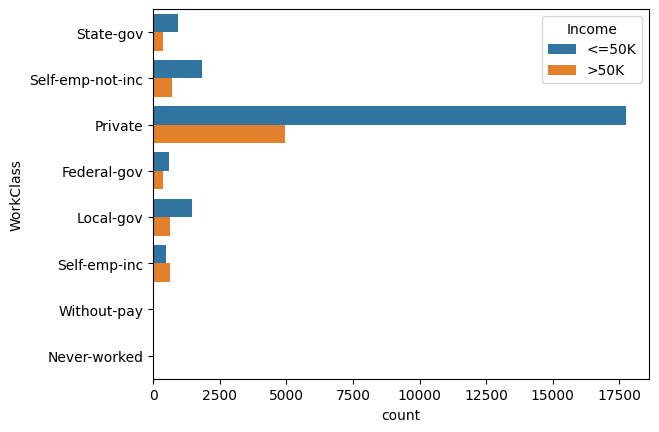

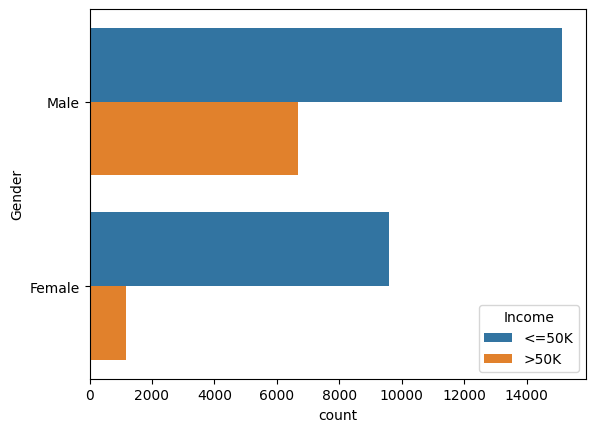

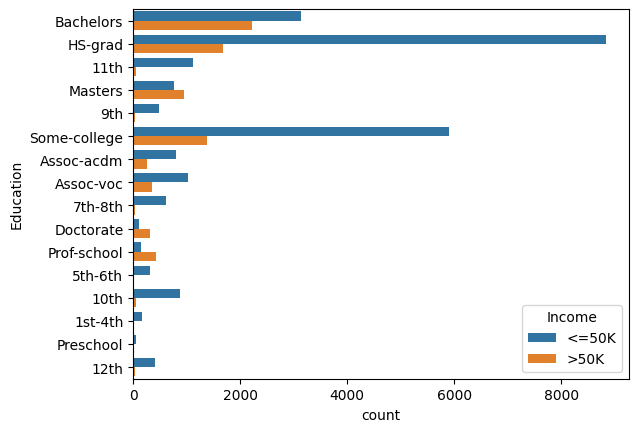

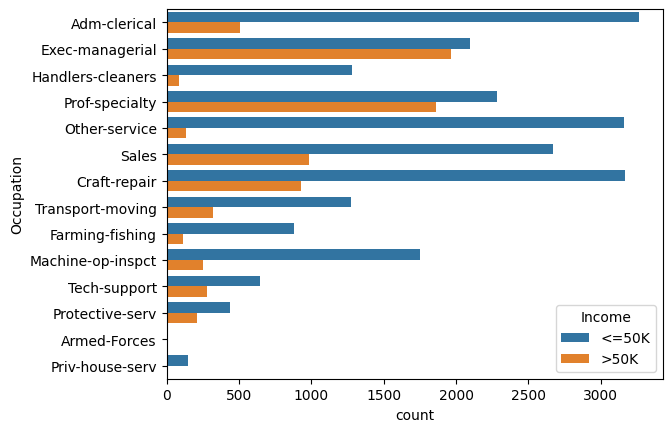

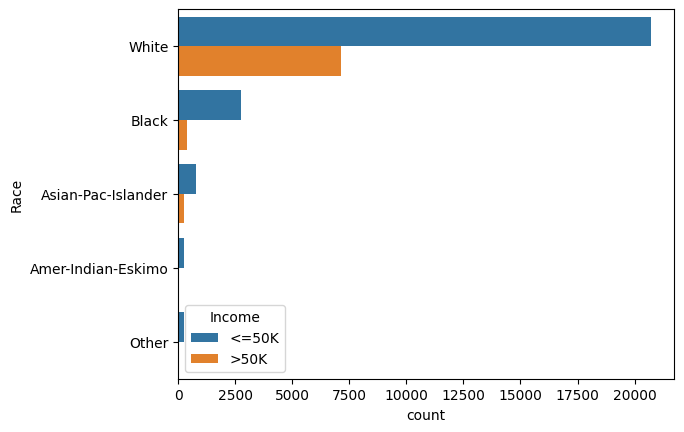

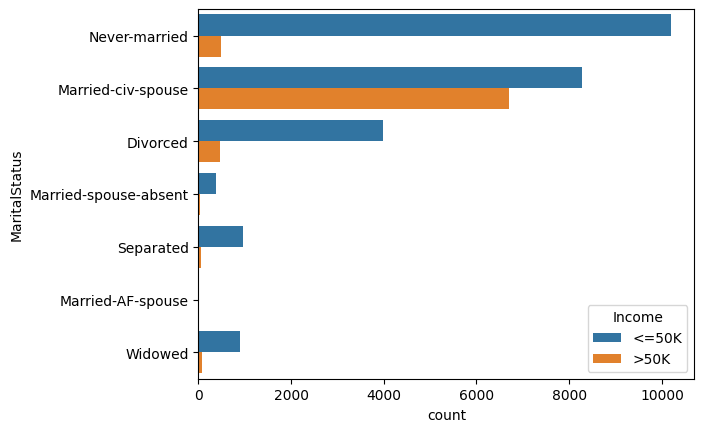

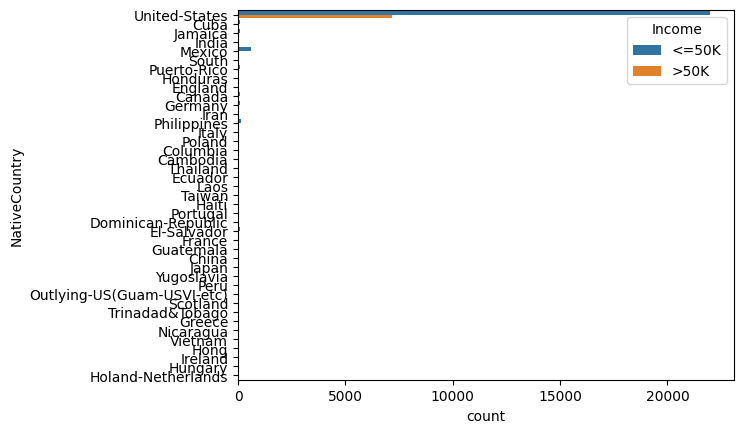

In [57]:
import matplotlib.pyplot as plt

for attribute in set(categorical) - set(['Income']):
    plt.figure()
    sns.countplot(y=attribute, hue='Income', data=df)

## Plotting Numerical attributes

To look at the balance/discriminative effect of the numerical attributes among the predicted attribute, you can use the seaborn `distplot(series, color='blue')` function to plot the histogram and the distribution of values of a time series. The use of `color` either `blue` or `orange` will create the plot for the two classification values.

Differently from the previous case, you should explicitly filter the dataset and the attribute, that is `distplot(df[df["Income"] == ">50K"][attribute], color="orange")` is the way the function must be called. Furthermore, you can add a legend this way `plt.legend(("<=50K", ">50K"))`.

You will notice that, in a coarse grain view, there is no clear overlapping distributions among the different attributes, so all of them could be profitably used for classification purpose.

<Figure size 640x480 with 0 Axes>

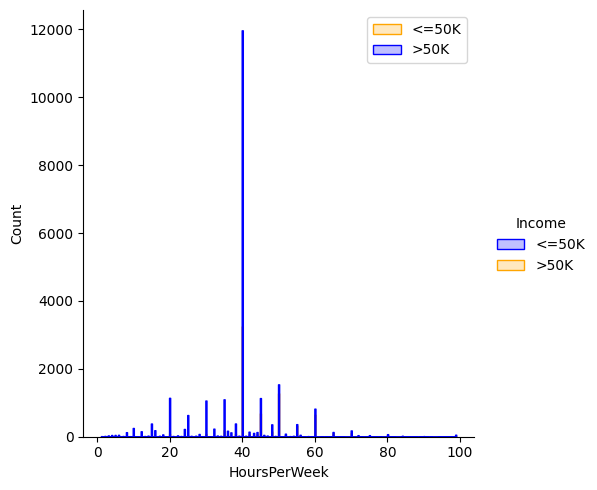

<Figure size 640x480 with 0 Axes>

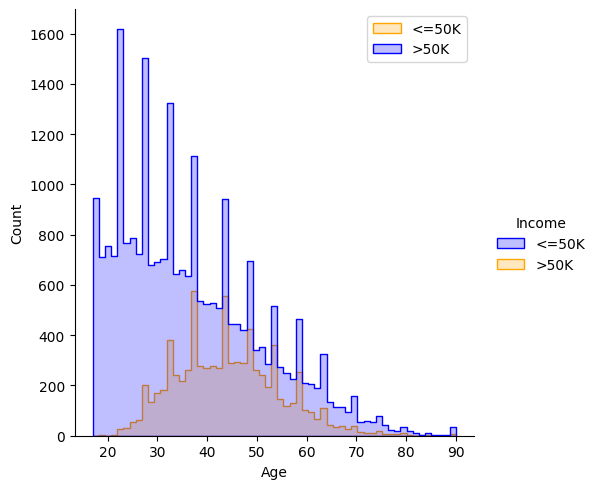

<Figure size 640x480 with 0 Axes>

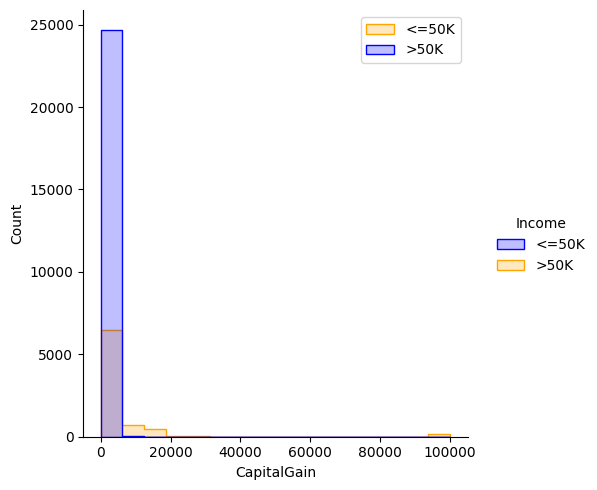

<Figure size 640x480 with 0 Axes>

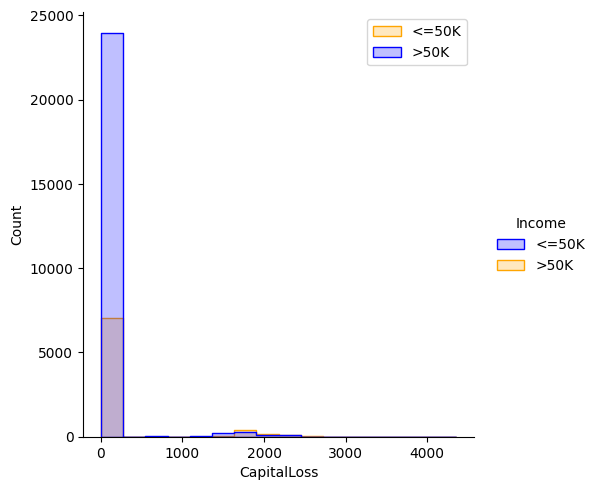

<Figure size 640x480 with 0 Axes>

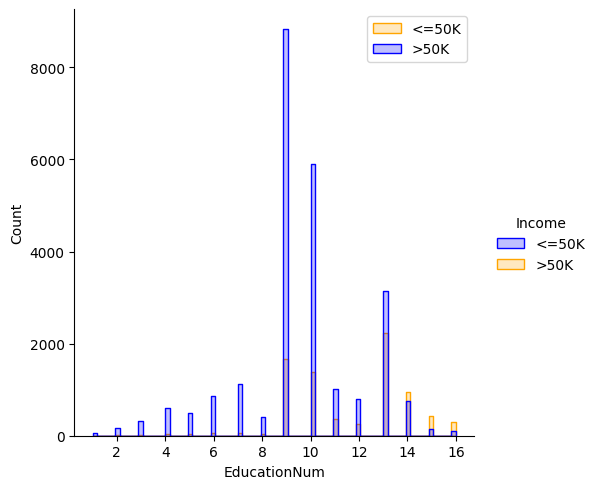

In [58]:
for attribute in set(df.columns) - set(categorical):
    plt.figure()
    sns.displot(df, x=attribute, hue="Income", palette=['blue', 'orange'], element="step")
    plt.legend(("<=50K", ">50K"))

## Exercise: computing Gini index for categorical attribute values

The following function will compute the Gini-index for all values of a possible categorical attribute, with respect to the classification attribute `c_attribute`.

Compare the pictures with the value counts with the computation of the Gini index and look at those attributes that have a higher discriminative power (the lower the Gini value, the higher the discriminative power).

In [59]:
def gini(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    _df_agg = (_df.groupby([attribute, c_attribute]).size() / _df.shape[0]) ** 2
    return _df_agg.reset_index().groupby(attribute).apply(lambda s: 1.0 - sum(s[0]))  

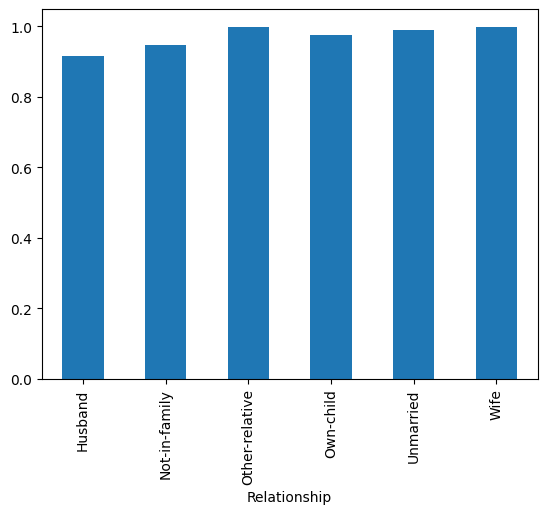

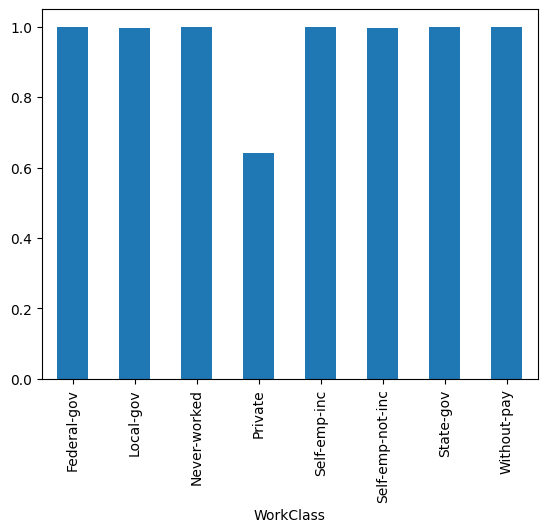

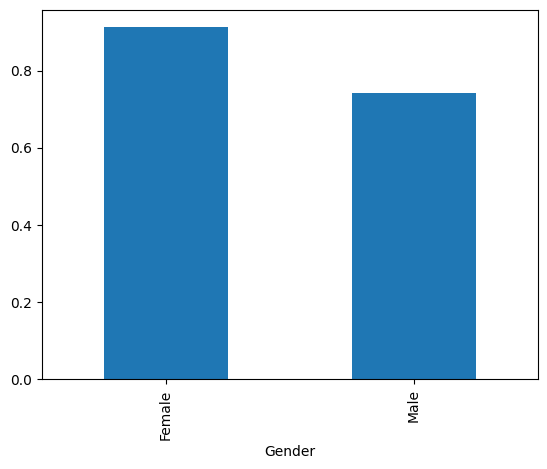

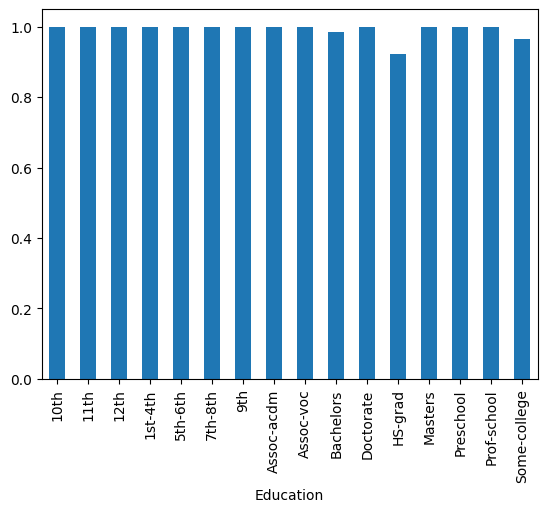

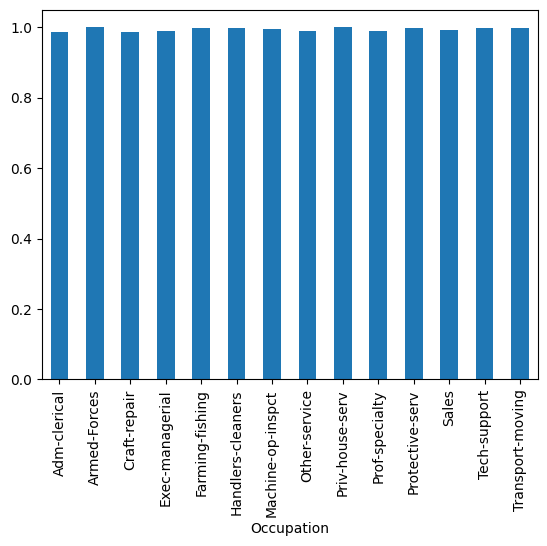

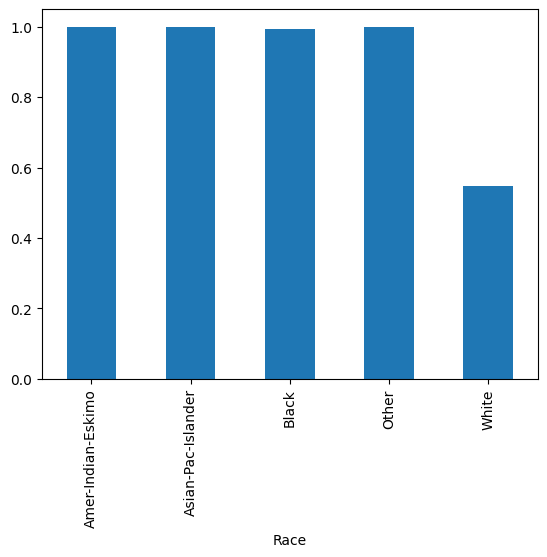

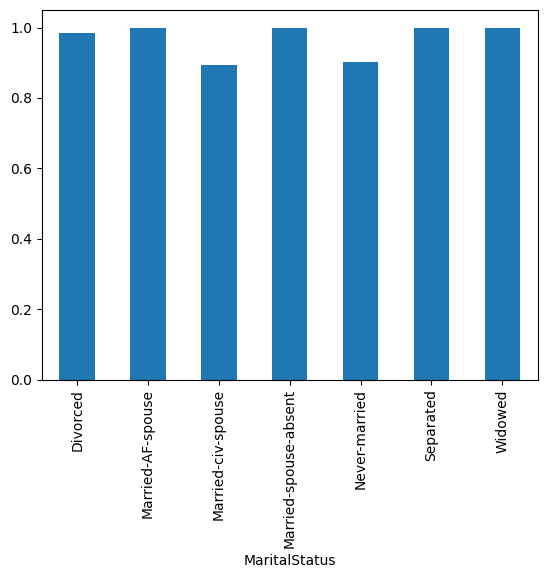

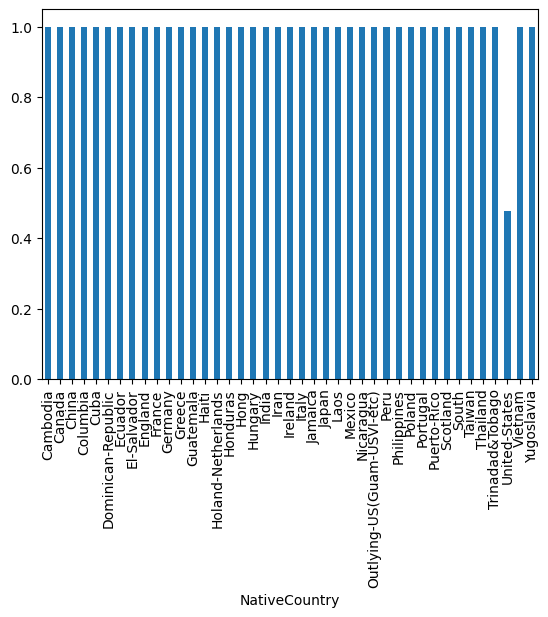

In [60]:
for attribute in set(categorical) - set(['Income']):
    gini_index = gini(df, attribute, 'Income')
    # print(gini_index)
    plt.figure()
    gini_index.plot.bar()


## Exercise: computing and inspecting Fisher score for numerical attributes

The following function will compute the Fisher-score for a possible numerical attribute, with respect to the classification attribute `c_attribute`.

Compare the pictures with the value counts with the computation of the Fisher score and look at those attributes that have a higher discriminative power (the higher the Fisher score, the higher the discriminative power).

In [61]:
def fisher(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    g = _df.groupby(c_attribute)
    p = g.size() / _df.shape[0]
    return sum(p * (g[attribute].mean() - _df[attribute].mean()) ** 2) / sum(p * g[attribute].var())

<BarContainer object of 5 artists>

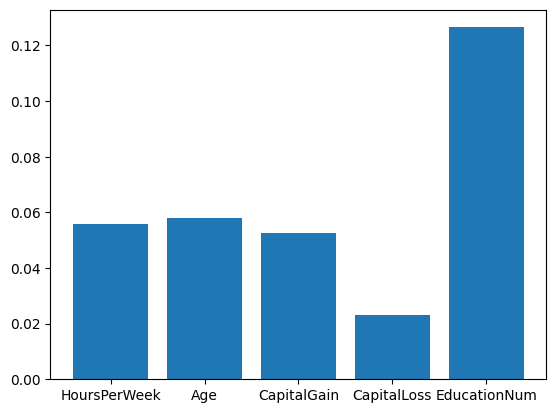

In [62]:
a = list(set(df.columns) - set(categorical))

fisher_scores = [fisher(df, attribute, 'Income') for attribute in a]

plt.figure()
plt.bar(a, fisher_scores)


## Exercise: comparison

Write a few statements comparing the discriminative power of the categorical attributes w.r.t. the classification attribute as computed by the Gini index or by the Fisher score. Are there notable differences?

For categorical attributes, higher discriminative power is directly related to the size of the categories. For example, for the 'NativeCountry' attribute, which has a majority of US residents, leads to an almost flat chart (in terms of discriminative power), except for the United States, which has a value of about 0.5.

## Exercise: feature engineering

Some of the categorical features have some values that are a bit too detailed and not so informative. For example, marital status as the following categories 
```
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
 ```
and some of them could be collapsed, e.g., the different `Married` variants, the `Never-married` and the different kind of no-more married (`Divorced/Separated/Widowed`).

Create a new column `Married` in the dataframe encoding these new values by converting from the original `MaritalStatus`.

Then, compare the Gini index of the new attribute values with the values of the `MaritalStatus`, are they more discriminative than the previous ones?

Married
False    0.756210
True     0.886124
dtype: float64
MaritalStatus
Divorced                 0.984857
Married-AF-spouse        1.000000
Married-civ-spouse       0.893034
Married-spouse-absent    0.999860
Never-married            0.901796
Separated                0.999128
Widowed                  0.999216
dtype: float64


<Axes: xlabel='MaritalStatus'>

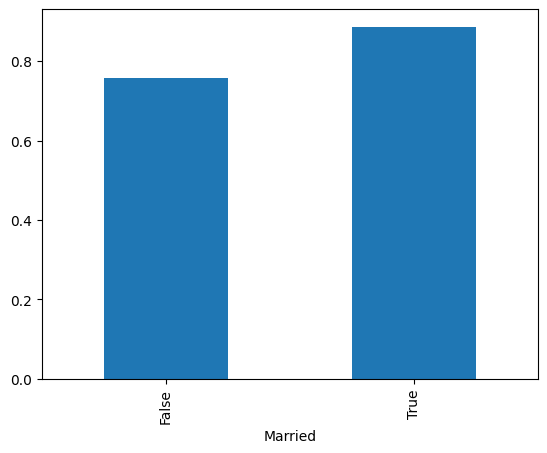

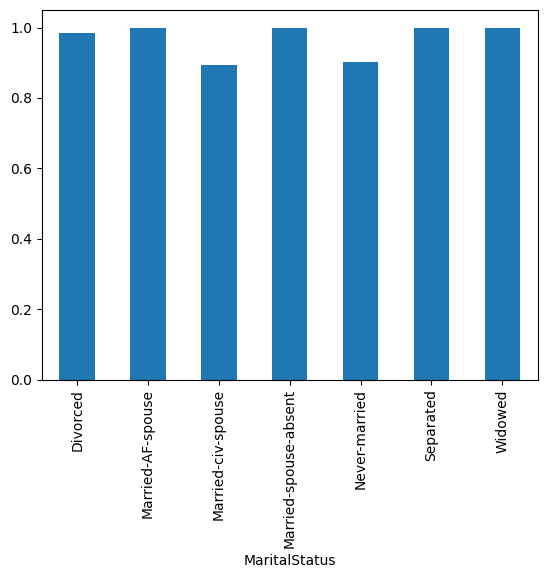

In [63]:
df['Married'] = df['MaritalStatus'].isin(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'])

categorical.append('Married')

gini_index_married = gini(df, 'Married', 'Income')
print(gini_index_married)

gini_index_marital_status = gini(df, 'MaritalStatus', 'Income')
print(gini_index_marital_status)

# Plot.
plt.figure()
gini_index_married.plot.bar()

plt.figure()
gini_index_marital_status.plot.bar()

**Notice** in general it's meaningful to create new features to improve the accuracy of the classification task. The feature engineering can also be simplified, for example, by using some library such as [Feature Tools](https://featuretools.alteryx.com/en/stable/) which automatically synthesizes a number of features based on common data types. 

# Data transformation

Unfortunately, pandas dataframes, when categorical variables are present, cannot directly be managed by `scikit-learn` because the library expects to deal with numerical values only (possibly encoding the categorical variables). However, the library makes available a set of *encoders*, that is, utility functions for encoding and decoding from/to categorical content. Furthermore, `scikit-learn` features a number of other data transformations (one of those has been already used, i.e., the `TfIdfVectorizer`) including functions for imputing missing values (imputers) and scaling/normalizing numerical values.

Data transformation from pandas to the `scikit-learn` analysis could be profitably organized in terms of *pipelines*, whose components are nothing but some data transformation/learning classes that will deal with a composite analysis task. More detail on that later.

A handful library for customizing the transformations to be applied to pandas dataframe is `sklearn-pandas`. If it has not been already installed you might install it by means of the command
```bash
!pip3 install sklearn-pandas
```
The library provides the `DataFrameMapper` function, which defines a set of transformations to be applied to a dataframe in order to obtain a `numpy` array suitable for processing with `scikit-learn`.

## Exercise: basic data transformation, encoding categories

The most common way to encode categorical (non-ordinal) data is by means of the, so-called, *one-hot* or *dummies* encoder. For example, if the categorical data has three categories, `Red`, `Yellow`, and `Orange`, a single value can be encoded by a triple of `0-1` values, one for each category, and the value is `1` only for the specific encoded category. That is, `Red` might be `[1, 0, 0]`, `Yellow` `[0, 1, 0]`, and `Orange`, `[0, 0, 1]`.

In `scikit-learn`, the encoders are available in the `sklearn.preprocessing` package, and in particular this categorical encoding is available from the `OneHotEncoder` class.

The usage of `scikit-learn` classes follows the same pattern we already seen:

1. create the suitable `scikit-learn` object by instantiating the class and passing the relevant parameters;
2. *“train”* the object passing to the `fit()` method the data that has to be manipulated or used for training;
3. *“use“* the object for transformation by calling the `transform()` method on the data (either on the test, if the object is a model or the very same data used for fitting if it is a transformation object).

Recall that, in case you are dealing with transformation objects (such as those used in preprocessing) you can collapse phases 2 and 3 into a single one by calling the `fit_transform()` method just once.

In this exercise you are required to test the capabilities of the `OneHotEncoder` class.

Notice that you can provide multiple columns to the `fit()` or `fit_transform()` method, in such a case you will get a (different) encoding for each single attribute.

See what's happening when you try to encode the `MaritalStatus` and `Gender` attributes (both with the same `OneHotEncoder` object). Only for this exercise, it might be useful, when you create the `OneHotEncoder` object to pass the parameter `sparse=False` to get a *readable* output (if you don't do this you will get a sparse matrix, which efficiently stores the `0-1` structure by memorizing only the ones and their coordinates).

In order to check the mapping between categories and the positions in the encoded array you can inspect the `.categories_` field of the encoding object.

Try also to use the `.inverse_transform()` method of the encoding object to get the inverse mapping from the encoding array into the original categories. For example, you might try with `[0., 0., 0., 0., 1., 0., 0., 0., 1.]` and check the result.
Notice that you will have to embed the encoding into a list to get the results (i.e., `[[0., 0., 0., 0., 1., 0., 0., 0., 1.]]`).

In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['MaritalStatus', 'Gender']])
display(encoded)

inverse = encoder.inverse_transform(encoded)
display(inverse)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

array([['Never-married', 'Male'],
       ['Married-civ-spouse', 'Male'],
       ['Divorced', 'Male'],
       ...,
       ['Widowed', 'Female'],
       ['Never-married', 'Male'],
       ['Married-civ-spouse', 'Female']], dtype=object)

## Exercise: encoding ordinals

In the dataframe, the `Education` attribute, although categorical, is clearly ordinal and deserves a special treatment. Pandas treatment of ordinal categories requires

The (increasing) order of the values for the `Education` attribute is the following:

```
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters',
 'Doctorate']
```

In order to convert an attribute to a categorical ordinal attribute you can use the `.astype()` method on that specific column of the dataframe. In general `.astype()` can take a string with the new type, when the type is a basic one (like `int`, `bool`, etc.), however for this case we must recode the attribute by fully specifying a new categorical ordinal type. 

The new type can be created with the `CategoricalDtype()` constructore (available in `pandas.api.types`), which takes the `categories=['Preschool', ...]` as the specification of the category labels. Moreover, you should provide a `ordered=True` parameter to set it as ordered. The new object can be used as a new type in the `.astype()` method to convert the column.

The task of this exercise is to convert the `Education` column into its categorical/ordered form. Ensure that this is really the case, by issuing `df['Education'].head()` and check the output.

In [65]:
from pandas.api.types import CategoricalDtype

EducationType = CategoricalDtype(categories=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters',
 'Doctorate'], ordered=True)

df['Education'] = df['Education'].astype(EducationType)

display(df.head())

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Married
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True


## Exercise: basic data transformation, `scikit-learn` encoding of ordinals

Once the `Education` column is correctly transformed into an ordered attribute, still there is the need to convert it in numerical form in order to be handled by `scikit-learn`. This is the purpose of the `OrdinalEncoder` class (also in the `sklearn.preprocessing` package). This class will transform each category into an integer number comprised between $0$ and $n_{categories} - 1$. For nominal categories the conversion is automatic, however, in order to specify an ordinal you should pass the specific order in the constructor.

The order of the categories of the `Education` attribute can be accessed as `df['Education'].cat.categories` and, possibly, transformed into a list. Similarly to the `HotOneEncoder` the encoder expects to work on multiple columns, therefore you should 
1. extract the transformed column as a dataframe and not as a simple series (i.e., using `[['Education']]` as the selector);
2. express the `categories` parameter in the `OrdinalEncoder` constructor as a list of lists.

Try to setup an ordinal encoder for the case at hand and test it on the `Education` attribute of the dataframe. If everything is fine you should get the following output (notice that value 13 corresponds to the index of `Bachelor` in the categories).

```
array([[13.],
       [13.],
       [ 8.],
       ...,
       [ 8.],
       [ 8.],
       [ 8.]])
```

**Important Notice** you might encounter an error in using `OrdinalEncoder` if the `scikit-learn` library is older than version `0.20.2`. In such a case, or to prevent such a case, install the newer version by issuing the command 
```
!pip install -U scikit-learn
```

In [66]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[df['Education'].cat.categories])
encoded = encoder.fit_transform(df[['Education']])
display(encoded)

array([[13.],
       [13.],
       [ 8.],
       ...,
       [ 8.],
       [ 8.],
       [ 8.]])

## Handling missing values

Unfortunately, classification methods cannot deal with missing values, therefore they need to be properly handled. This is classified as an **hotspot**, which is a design choice that might impact on the analysis and more than a single alternative has to be tested.

First of all, let's check how many missing values are present and on which attributes.

`df.isnull().sum()`

In [67]:
df.isnull().sum()

Age                 0
WorkClass        1836
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     583
Income              0
Married             0
dtype: int64

Looking at the missing values, these are limited to the occupation related attributes (`Occupation` and `WorkClass`) and the `NativeCountry`. For these categorical attributes it would be not meaningful to infer any value such as the most frequent one, which might even be misleading. Therefore, a reasonable way to deal with those value is to impute them with a further `Unknown` category, which will encode the absence of this information.

## Exercise: impute the missing values

Update the dataframe so that the missing values will be assigned to the `Unknown` category.
Do it for any single column.

In [68]:
df['WorkClass'].fillna('Unknown', inplace=True)
df['Occupation'].fillna('Unknown', inplace=True)
df['NativeCountry'].fillna('Unknown', inplace=True)

## Exercise: combine basic data transformations with `sklearn-pandas`

Notice that each transformation will just return a subset of the transformed data, in particular you should assemble all the different outputs into a comprehensive matrix in order to be used with the `scikit-learn` classification facilities.

As already mentioned, the `sklearn-pandas` library provides a handful way to combine basic data transformation on a single dataframe in order to get a single assembled output.

The relevant class is `DataFrameMapper` which does the magic. You can refer to [https://github.com/scikit-learn-contrib/sklearn-pandas](https://github.com/scikit-learn-contrib/sklearn-pandas) for a detailed documentation.

The purpose of the exercise is to come up with a single transformation that will put together all the different encoding employed.

You can specify a composite transformation by providing to the `DataFrameMapper` constructor a list of tuples, in which the first element is the column (or a list of columns) on which the transformation has to be performed and the second element is the object that will perform the transformation (or a list of objects if multiple subsequent transformations are needed), which might be created *on-the-fly*. 

Notice that only the columns that are listed in the datamapper will be transformed and included in the result. If you want to include a set of non-transformed columns you should provide a tuple with a list of those columns and `None` as the transformation to be applied.

Recall, that if the preprocessing expects a dataframe instead of a series (e.g., the `OrdinalEncoder` used just before) you should express the single column as a list, i.e., `['Education']`.

Finally, in order to be completely general, pass `"ignore"` to the `HotOneEncoder(handle_unknown='ignore')` constructor so that it will silently handle missing categories.

Once a `DataFrameMapper` object is in place, you can call the `fit()` method directly from the created object, whereas the `transform()` method will return the composite transformation.

Call this first `DataFrameMapper` just `encoding`.

Write another `DataFrameMapper` (call it `encoding_target`) just for the target variable `Income`, that applies only a default `OrdinalEncoder` to that variable. 

In [69]:
from sklearn_pandas.dataframe_mapper import DataFrameMapper

# 'WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry', 'Married'

encoding = DataFrameMapper([
    (['WorkClass'], OrdinalEncoder()),
    (['Education'], OrdinalEncoder(categories=[df['Education'].cat.categories])),
    (['MaritalStatus'], OrdinalEncoder()),
    (['Occupation'], OrdinalEncoder()),
    (['Relationship'], OrdinalEncoder()),
    (['Race'], OrdinalEncoder()),
    (['Gender'], OrdinalEncoder()),
    (['NativeCountry'], OrdinalEncoder()),
    (['Married'], OrdinalEncoder()),
], df_out=True)

encoding_target = DataFrameMapper([
    (['Income'], OrdinalEncoder()),
], df_out=True)

## Exercise: basic classification, train/test splitting

We check if everything is ready for training a basic classifier in the simplest way. In order to do so define a `X` variable containing all the encoded data of your dataframe but the `Income` column (`df.columns != "Income"` is an expression that can be used with the `.loc[]` selection method) and a `y` variable with just the encode data from the `Income` column. **Remember** to encode the parts of the dataframe you assign to `X` and `y`.

As for this basic experiment we will need to split the data into training and testing through the `train_test_split()` function in `sklearn.model_selection` and we will make use of a `DecisionTreeClassifier` as the classification method (importing from the `sklearn.tree` package).

In particular, in the case of unbalanced classes, the `train_test_split()` function can be provided with a `stratify=` parameter that will reproduce the class balancing in the train/test split. 

1. Divide the `X` and `y` variables into `X_train`, `X_test` and `y_train`, `y_test` by means of the `train_test_split()` function. Use `y` as the stratification variable so that the train/test samples will be stratified.
2. Create a basic `DecisionTreeClassifier()` (do not set any parameter, it's just for experimenting right now).
3. Fit the `DecisionTreeClassifier` object with the `X_train` and `y_train` part of the dataset. The `fit()` function in case of a classifier takes two arguments, the data `X` and the target variable `y`. 
4. Use the `.predict(X_test)` method on the `DecisionTreeClassifier` to get a `y_pred` class prediction.
5. Use the function `accuracy_score(y_pred, y_test)` in the package `sklearn.metrics` to compare the predicted values with the actual ones and computing the accuracy.

In [70]:
X = encoding.fit_transform(df)
y = encoding_target.fit_transform(df)

display(X)
display(y)

# Divide into train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train a decision tree.
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict.
y_pred = classifier.predict(X_test)

# Evaluate.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,NativeCountry,Married
0,6.0,13.0,4.0,0.0,1.0,4.0,1.0,38.0,0.0
1,5.0,13.0,2.0,3.0,0.0,4.0,1.0,38.0,1.0
2,3.0,8.0,0.0,5.0,1.0,4.0,1.0,38.0,0.0
3,3.0,6.0,2.0,5.0,0.0,2.0,1.0,38.0,1.0
4,3.0,13.0,2.0,9.0,5.0,2.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...
32556,3.0,10.0,2.0,12.0,5.0,4.0,0.0,38.0,1.0
32557,3.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0,1.0
32558,3.0,8.0,6.0,0.0,4.0,4.0,0.0,38.0,0.0
32559,3.0,8.0,4.0,0.0,3.0,4.0,1.0,38.0,0.0


,Income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
32556,0.0
32557,1.0
32558,0.0
32559,0.0


0.8164844613683823

## Exercise: creating a pipeline

The full analysis process, from the dataframe to the creation of the classifier and its fitting can be automated in a `sklearn.pipeline.Pipeline`, i.e., a set of preprocessing / classification steps, that can be then be tuned. The steps are provided to the pipeline as a list of tuples, whose first field is the name of the step (a string) and the second one is the object that will handle that step.

Write a pipeline consisting of two steps: the first one, called "preprocess" will be the encoding of the dataframe into its `numpy` counter part (i.e., the `encoding` object created before), the second one, called "decision_tree", will just create a `DecisionTreeClassifier` object).

The pipeline can be used with `.fit()` and `.predict()` as a normal classifier, with the difference that it will first apply the `encoding`, therefore it will take, instead of the `X` encoded dataset, a full pandas dataframe (e.g., `df`). In other words, if `pipeline` is the name of the pipeline, you can directly call `pipeline.fit(df, y)` (where `y` is the encoded target variable; we need it in this form because pipelines apply transformations only to `X` variables and not to the target one).

In [71]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocess', encoding),
    ('decision_tree', DecisionTreeClassifier())
])

pipeline.fit(df, df['Income'])

y_pred = pipeline.predict(df)

accuracy_score(df['Income'], y_pred)

0.8656368047664383

**Notice** that, in this case, we didn't have a test set and we train and test the resulting classifier on the content of the whole dataframe (that's why the accuracy is sensibly higher than in the previous case, but of course, this will give rise to overfitting), we see how to deal with a proper measure in the following.

## Exercise: cross validation

The pipeline can be used in a setting with the $k$-fold cross-validation method, to get several estimates of some performance metrics and get a more confident evaluation of the classifier. The `cross_validate` function is available from `sklearn.model_selection` and can be called like this: 
`cross_validate(pipeline, df, y, cv=10, return_train_score=False)`
using the `pipeline` instead of the classifier. 

The `cross_validate` function will split the `df` and the `y` into train/test (according to the $k$-fold sampling), the number of foldings are specified in the `cv` parameter. It will return a dictionary with several metrics, in particular the `test_score` is the sequence of estimates of the accuracy.

In [72]:
from sklearn.model_selection import cross_validate

dt_pipeline = Pipeline([
    ('preprocess', encoding),
    ('decision_tree', DecisionTreeClassifier())
])

scores_dt = cross_validate(dt_pipeline, df, df['Income'], cv=10, return_train_score=False)

scores_dt

/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/

{'fit_time': array([0.08457017, 0.07334614, 0.07142305, 0.07183003, 0.07166409,
        0.07150626, 0.07136726, 0.06971192, 0.06966305, 0.06987286]),
 'score_time': array([0.01017308, 0.00831103, 0.00833988, 0.00815415, 0.00813127,
        0.00819087, 0.00426602, 0.00806713, 0.00820303, 0.00801802]),
 'test_score': array([0.81056187, 0.81664619, 0.82248157, 0.8022113 , 0.81910319,
        0.81296069,        nan, 0.81879607, 0.82094595, 0.81296069])}

## Exercise compare two basic classifiers

In this exercise we will use cross validation data to roughly compare two basic classifiers. The first one is the one we obtained before through the pipeline, and we also use a basic Support Vector Machine classifier, which is available from will be available as the class `LinearSVC` from the `sklearn.svm` package. We will build it in another pipeline.

**Notice** training a SVC will take considerably longer than training a decision tree, therefore you should expect the training phase to last for some minutes.

Once the cross validation results are available also for the svc, compose those of the decision trees and those of the svc in a dataframe with two columns and plot a boxplot to see whether the two performance distributions are comparable or not.

When the dataframe has been prepared, you can call the method `plot.box()` on that to get that plot.

From the picture you will probably appreciate that the decision tree gives more consistent results than the svc.

/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/li

<Axes: >

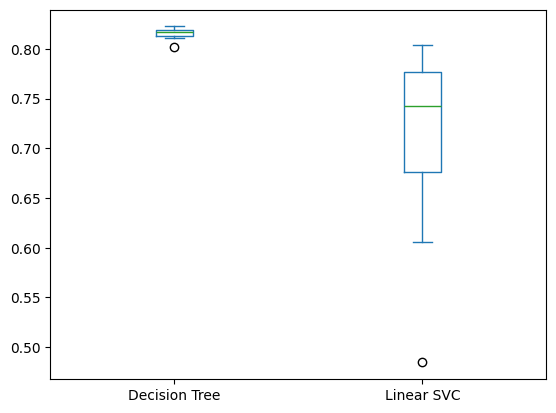

In [73]:
from sklearn.svm import LinearSVC

lsvc_pipeline = Pipeline([
    ('preprocess', encoding),
    ('linear_svc', LinearSVC())
])

scores_svc = cross_validate(lsvc_pipeline, df, df['Income'], cv=10, return_train_score=False)

# Combine scores_dt and scores_svc.
scores = pd.DataFrame({
    'Decision Tree': scores_dt['test_score'],
    'Linear SVC': scores_svc['test_score'],
})

scores.plot.box()


## Exercise: parameter setting

We will setup a `GridSearchCV` (in `sklearn.model_selection`) which exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter passed in the constructor.

In particular, in the case of a pipeline, the parameters will have a hierarchical name composed by the name of the pipeline step followed by two underlines and then the name of 
specific parameter for that step. 

The parameters of the different steps of a pipeline can be accessed by means of the `pipeline.get_params()` method.

In particular, we will deal with the `max_depth` and `min_samples_split` parameters of the `DecisionTree`, but in principle it can be used with any number of parameters.

In particular, the `param_grid` has to be specified as a dictionary of the following form:

```
parameters = { 'decision_tree__max_depth': [2, 3, 4], 'decision_tree__min_samples_split': [0.05, 0.1, 0.2] }
```

The `GridSearchCV` object also takes the number of $k$-fold cross validation to be performed for each parameter setting in order to decide the best one, through the `cv` parameter. In general you can just provide an integer value, as in the previous exercise, but, in case of unbalanced classes, you might want to use a stratified sampling so that the folds will dub the distribution of the original dataset. In that case you can use, as a value for `cv` a `StratifiedKFold()` object with the number of folds you want to use.

The use of `GridSearchCV` is similar to the other `sklearn` objects: `.fit()` takes the training data and the target variable and the result of the search can be accessed as the `.cv_results_` attribute.

In order to inspect the outcome of the grid search, the results can be transformed into a pandas dataframe and sorted by the `rank_test_score` field as in the following:

```
pd.DataFrame(gs.cv_results_).sort_values(by="rank_test_score").head(5)
```

Moreover, the best parameter settings is available in the `.best_params_` field.

Finally, the best classifier is available in the `.best_estimator_` field, so it can be extracted and used for further analysis.

**Notice**: you can increase the number of values of the parameters, however keep in mind that since all the possible combinations of values are tested, this might give raise to a combinatorial explosion and the `GridSearchCV` could take very long to find the best setting.

In [74]:
print(dt_pipeline.get_params().keys())

from sklearn.model_selection import GridSearchCV

parameters = {
    'decision_tree__max_depth': [2, 4, 8, 16, 32, 64],
    'decision_tree__min_samples_split': [2, 4, 8, 16, 32, 64],
}

grid_search = GridSearchCV(dt_pipeline, parameters, cv=10, return_train_score=False, n_jobs=8)
grid_search.fit(df, df['Income'])

outcome = pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(10)

outcome

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'decision_tree', 'preprocess__default', 'preprocess__df_out', 'preprocess__drop_cols', 'preprocess__features', 'preprocess__input_df', 'preprocess__sparse', 'decision_tree__ccp_alpha', 'decision_tree__class_weight', 'decision_tree__criterion', 'decision_tree__max_depth', 'decision_tree__max_features', 'decision_tree__max_leaf_nodes', 'decision_tree__min_impurity_decrease', 'decision_tree__min_samples_leaf', 'decision_tree__min_samples_split', 'decision_tree__min_weight_fraction_leaf', 'decision_tree__random_state', 'decision_tree__splitter'])


/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107810,0.022425,0.017353,0.005398,2,2,"{'decision_tree__max_depth': 2, 'decision_tree...",0.794596,0.786548,0.805283,0.794533,0.802826,0.806818,NaN,0.809582,0.807432,0.809275,NaN,NaN,1
20,0.085833,0.003194,0.009684,0.001979,16,8,"{'decision_tree__max_depth': 16, 'decision_tre...",0.822229,0.820639,0.827088,0.811118,0.830160,0.818182,NaN,0.828317,0.825860,0.820025,NaN,NaN,1
21,0.084024,0.002698,0.009506,0.001452,16,16,"{'decision_tree__max_depth': 16, 'decision_tre...",0.824992,0.821253,0.828624,0.815725,0.834152,0.816339,NaN,0.828624,0.830160,0.823403,NaN,NaN,1
22,0.085931,0.002848,0.010122,0.002116,16,32,"{'decision_tree__max_depth': 16, 'decision_tre...",0.824685,0.820332,0.829853,0.811732,0.832924,0.819410,NaN,0.831081,0.830467,0.819717,NaN,NaN,1
23,0.081829,0.002983,0.010462,0.002013,16,64,"{'decision_tree__max_depth': 16, 'decision_tre...",0.827449,0.822789,0.830774,0.815111,0.833845,0.818796,NaN,0.834459,0.832617,0.820946,NaN,NaN,1
24,0.088117,0.004216,0.010836,0.003578,32,2,"{'decision_tree__max_depth': 32, 'decision_tre...",0.811483,0.816953,0.822482,0.803133,0.819103,0.811732,NaN,0.819103,0.821867,0.814496,NaN,NaN,1
25,0.089637,0.004419,0.010137,0.000467,32,4,"{'decision_tree__max_depth': 32, 'decision_tre...",0.813632,0.816953,0.824017,0.804668,0.823710,0.814803,NaN,0.823096,0.823096,0.812961,NaN,NaN,1
19,0.084941,0.003065,0.010368,0.002630,16,4,"{'decision_tree__max_depth': 16, 'decision_tre...",0.820387,0.816953,0.827703,0.809889,0.827396,0.816953,NaN,0.824017,0.824017,0.815725,NaN,NaN,1
26,0.105283,0.009976,0.012761,0.003780,32,8,"{'decision_tree__max_depth': 32, 'decision_tre...",0.817317,0.821560,0.824939,0.807740,0.826474,0.817260,NaN,0.828010,0.827703,0.816953,NaN,NaN,1
28,0.107843,0.009619,0.016004,0.005316,32,32,"{'decision_tree__max_depth': 32, 'decision_tre...",0.824378,0.822482,0.827396,0.810197,0.829545,0.818182,NaN,0.830774,0.831081,0.820332,NaN,NaN,1


Besides accuracy, the `GridSearchCV` can use also different performance metrics through the `scoring` parameter (possibly using the `make_scorer()` function if a custom metric is needed). For example, if **precision** is more important than accuracy (typically if true positives are more relevant than true negatives) you can equip `GridSearchCV`, for example, as in the following:

```
gs = GridSearchCV(pipeline, parameters, cv=StratifiedKFold(5), scoring='precision')
```

## Exercise: plot the ROC curve to compare two classifier

The function `plot_roc()` accepts a variable number of classifiers and plot the ROC curve of all of them, so to allow to compare them.

Plot the ROC curve of the best `DecisionTree` classifier and compare it with the basic `LinearSVC` classifier.

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_roc(X, y, *classifiers, **kwargs):
    """
    This function will plot the Receiving Operating Characteristic
    for a number of classifiers.
    
    Parameters:
        X: the dataset to be used for fitting
        y: the target attribute
        classifiers: one or more classifiers
        names=classifier_names: a list of names for the classifiers
    """
    if len(classifiers) == 0:
        raise ValueError("You should provide at least a classifier")
    if 'names' in kwargs:
        if type(kwargs['names']) != list and type(kwargs['names']) != tuple:
            raise ValueError("Classifier names must either be a list or a tuple")
        if len(classifiers) > len(kwargs['names']):
            raise ValueError("Classifier names are provided but they are too few")
    # The train/test split should be the same for all the classifiers
    # so to compare them on a common ground
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    # iterates through classifiers
    for i, classifier in enumerate(classifiers):        
        classifier.fit(X_train, y_train) # train the model
        y_pred = classifier.predict(X_test) # predict the test data
        # compute false postive rate, and true positive rate
        if not hasattr(classifier, "predict_proba"):
            proba = classifier.decision_function(X_test)
        else:
            proba = classifier.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, proba)
        # calculate area under the curve to display on the plot
        auc = roc_auc_score(y_test, classifier.predict(X_test))
        # now, plot the computed values
        if 'names' in kwargs:
            name = kwargs['names'][i]
        else:
            name = i
        plt.plot(fpr, tpr, label='{} (area = {:0.2f})'.format(name, auc))

    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.025, 1.0])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="best")
    plt.show()   # display

/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


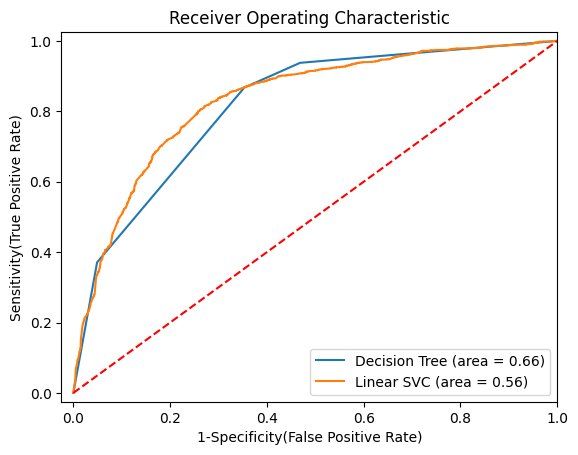

In [76]:
best_dt_classifier = DecisionTreeClassifier(max_depth=grid_search.best_params_['decision_tree__max_depth'], min_samples_split=grid_search.best_params_['decision_tree__min_samples_split'])
basic_lsvc_classifier = LinearSVC()

plot_roc(X, y, best_dt_classifier, basic_lsvc_classifier, names=['Decision Tree', 'Linear SVC'])

When the classifier is not very stable (e.g., the LinearSVC), the ROC curve might differ from one call to the next, therefore take the results with the right degree of criticism and repeat the plots for a few times before making any hypotheses on which is better.

## Exercise: confusion matrix

The `confusion_matrix` in the `sklearn.metrics` package computes a confusion matrix that allows you to better open the classification black-box.

Also in this case you have to setup a train/test split in order to measure it on the test set and get the predicted values.

Once you have the confusion matrix `cm`, it could be nicely plot by means of a seaborn `sns.heatmap()` plot such as:

```
sns.heatmap(cm, annot=True, fmt="d")
```

/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(50.722222222222214, 0.5, 'True')

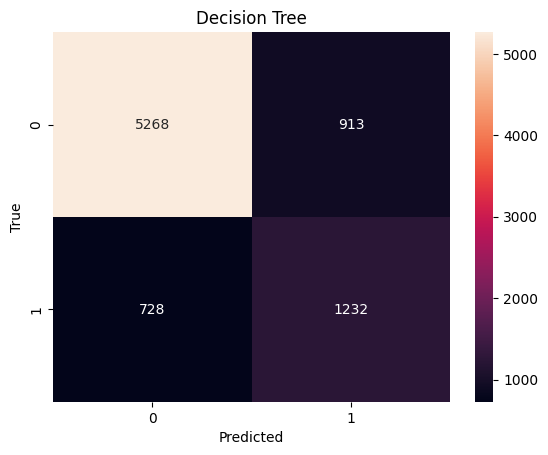

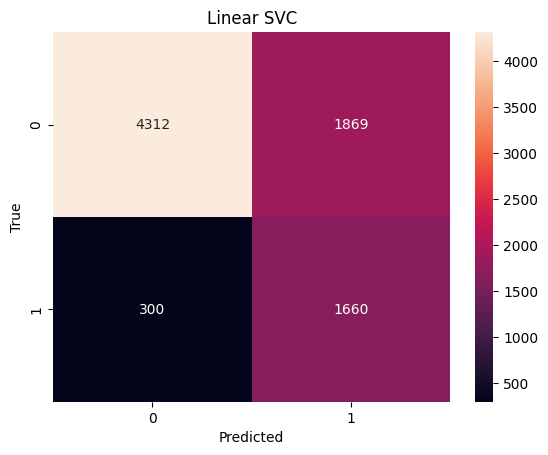

In [77]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


best_dt_classifier.fit(X_train, y_train)
y_pred = best_dt_classifier.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

basic_lsvc_classifier.fit(X_train, y_train)
y_pred = basic_lsvc_classifier.predict(X_test)

cm_lsvc = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm_lsvc, annot=True, fmt='d')
plt.title('Linear SVC')
plt.xlabel('Predicted')
plt.ylabel('True')

Write down a few statements for interpreting the results shown in the confusion matrix.

The decision tree classifier shows a good performance in terms of predicting the correct result. True positives and true negatives are the most common cases.

For the linear SVC, we can observe that there is a large amount of false negatives, more than true positives.

# Ensemble methods

Ensemble methods are a way to improve the accuracy by combining several models, with the aim of achieving better performances. In their essence there are *meta-algorithms*, that is a combination of techniques that try to decrease the variance in the data (bagging), the bias (boosting) or improve the predictions (stacking).

You can have a look at [this page](https://blog.statsbot.co/ensemble-learning-d1dcd548e936) for a more detailed coverage of the subject.

Ensemble methods can be divided into two groups:

* parallel methods: independent base learners are generated so that the classification error can possibly be reduced by grouping the results, for example bagging or stacking achieve this goal

* sequential methods: the base learners are generated one after the other: for example boosting methods create a sequence of (weak) learners whose purpose is specifically to learn how to identify data that has been mislabeled by previous learners in the sequence

### Bagging

The idea is to use $M$ different learners to reduce the variance of an estimate. Each classifier is trained independently, each on a random subset of the whole training dataset to ensure independence. Then, all trained classifiers are applied to unseen data and their outcomes are aggregated by *voting*, i.e., the class that has been selected by the highest number of learners will be the outcome of the bagging meta-learner.

Random Forests are bagging classifiers in which the basic classifiers are Decision Trees which are purposely constructed to increase the independence (for example the features for the splitting points are decided in a random way).

### Stacking

In the case of stacking there are two level of classifiers: the first level classifiers are classical learners that are independently trained. The second-level classifier, instead, learns how to create the final prediction on the basis of the combined predictions from the first level. In a sense, the second-level predictor is generalizing the *voting* aggregation of the bagging approach to a learning approach.

### Boosting

The idea behind boosting is to convert weak learners into a strong learner by sequentially adapting the learners to misclassified samples. For example AdaBoost will increase the weight (the relevance) of misclassified data in the following training phases so that the new learners are biased toward those examples. Notice that this seems to go against the advice of avoiding overfitting, but keep in mind that the kind of learners used are really very weak (say decision trees with a very limited depth) so the misclassification bias is actually a way to perform a sideways learning (i.e., of the weights of the combination of features giving rise to a data point).


## Exercise: bagging and comparison

Create and tune two `BaggingClassifier`s , one that uses a simple `DecisionTree` as its component and another with a `KNearestNeighbor` classifier. Compare them also with respect to the best decision tree you achieved earlier and a tuned single `KNearestNeighbor` classifier. Put the different classification outcomes in a table and try to provide an interpretation.

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree

dt_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier())
dt_bagging.fit(X_train, y_train)
y_pred = dt_bagging.predict(X_test)

cm_dt_bagging = confusion_matrix(y_test, y_pred)

best_dt_classifier.fit(X_train, y_train)
y_pred = best_dt_classifier.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred)

out = pd.DataFrame({
    'Bagging Decision Tree': cm_dt_bagging.ravel(),
    'Decision Tree': cm_dt.ravel(),
}, index=['True negative', 'False positive', 'False negative', 'True positive'])

display(out)

# KNN

knn_bagging = BaggingClassifier(base_estimator=KNeighborsClassifier())
knn_bagging.fit(X_train, y_train)
y_pred = knn_bagging.predict(X_test)

cm_knn_bagging = confusion_matrix(y_test, y_pred)

# Tuned single KNN

knn_pipeline = Pipeline([
    ('preprocess', encoding),
    ('knn', KNeighborsClassifier())
])

parameters = {
    'knn__n_neighbors': range(1, 20),
}

grid_search = GridSearchCV(knn_pipeline, parameters, cv=10, return_train_score=False, n_jobs=8)
grid_search.fit(df, df['Income'])

tuned_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['knn__n_neighbors'])
tuned_knn.fit(X_train, y_train)

y_pred = tuned_knn.predict(X_test)

cm_tuned_knn = confusion_matrix(y_test, y_pred)

out = pd.DataFrame({
    'Bagging KNN': cm_knn_bagging.ravel(),
    'Tuned KNN': cm_tuned_knn.ravel(),
}, index=['True negative', 'False positive', 'False negative', 'True positive'])

display(out)


/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Bagging Decision Tree,Decision Tree
True negative,5614,5268
False positive,567,913
False negative,901,728
True positive,1059,1232


/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  Fil

,Bagging KNN,Tuned KNN
True negative,5620,5354
False positive,561,827
False negative,914,985
True positive,1046,975


## Exercise: stacking classifier

The [mlxtend](http://rasbt.github.io/mlxtend/) library (you already used for Frequent Pattern Analysis) also implements a [`Stacking` classifier](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/). 

Try to compose the best `DecisionTree`, the best `SVC` and a properly tuned `Naive Bayes` classifiers into a stacking classifier and evaluate and compare the performance of the four classifiers.

In [86]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import CategoricalNB

# Tuned Naive Bayes
cnb_pipeline = Pipeline([
    ('preprocess', encoding),
    ('cnb', CategoricalNB())
])

parameters = {
    'cnb__alpha': np.linspace(0, 5, 10),
}

grid_search = GridSearchCV(cnb_pipeline, parameters, cv=10, return_train_score=False, n_jobs=8)
grid_search.fit(df, df['Income'])

tuned_cnb = CategoricalNB(alpha=grid_search.best_params_['cnb__alpha'])

# Best Linear SVC
best_lsvc_pipeline = Pipeline([
    ('preprocess', encoding),
    ('linear_svc', LinearSVC())
])

parameters = {'linear_svc__C': [1, 2, 10]}

grid_search = GridSearchCV(best_lsvc_pipeline, parameters, cv=10, return_train_score=False, n_jobs=8)
grid_search.fit(df, df['Income'])

best_lsvc = LinearSVC(C=grid_search.best_params_['linear_svc__C'])

# Stacking
stacking = StackingClassifier(classifiers=[best_dt_classifier, best_lsvc, tuned_cnb])
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

cm_stacking = confusion_matrix(y_test, y_pred)

# Test Decision Tree
best_dt_classifier.fit(X_train, y_train)
y_pred = best_dt_classifier.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred)

# Test Linear SVC
best_lsvc.fit(X_train, y_train)
y_pred = best_lsvc.predict(X_test)

cm_lsvc = confusion_matrix(y_test, y_pred)

# Test Naive Bayes
tuned_cnb.fit(X_train, y_train)
y_pred = tuned_cnb.predict(X_test)

cm_cnb = confusion_matrix(y_test, y_pred)

out = pd.DataFrame({
    'Stacking': cm_stacking.ravel(),
    'Decision Tree': cm_dt.ravel(),
    'Linear SVC': cm_lsvc.ravel(),
    'Naive Bayes': cm_cnb.ravel(),
}, index=['True negative', 'False positive', 'False negative', 'True positive'])

display(out)

/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/daml/lib/python3.10/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alph

TypeError: StackingClassifier.__init__() missing 1 required positional argument: 'meta_classifier'

### Exercise: final remarks

Draw some notes about the comparison of the different classifiers that have been tested. Is there a one that outperforms the others? To what extent? How sure can you be that this is true? Do you need some further significance testing to assess whether this is the case? 

Are there steps in the process that could be changed to increase the performance of the methods? If so, which ones should be suitable and in which direction would you go?